In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

proj_root = os.path.dirname(os.path.abspath("."))
# print(proj_root)
sys.path.append(proj_root)

from minatar_dqn.utils import my_logging
from minatar_dqn import my_dqn
from experiments.experiment_utils import seed_everything
from minatar_dqn.replay_buffer import ReplayBuffer

import random
import torch
import time

c:\Users\Chainsword\anaconda3\envs\general\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import torch.nn as nn
import torch.autograd as autograd

In [17]:
ex = torch.randn(32, 4, 10, 10)


features = nn.Sequential(
            nn.Conv2d(
                4, 32, kernel_size=3, stride=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                32,
                32,
                kernel_size=3,
                stride=1,
            ),
            nn.ReLU(),
        )

def size_linear_unit(features):
        return (
            features(autograd.torch.zeros(*[4, 10, 10])).view(1, -1).size(1)
        )

fc = nn.Sequential(
            nn.Linear(size_linear_unit(features), 64),
            nn.ReLU(),
            nn.Linear(64, 6),
        )

res = features(ex)

res = res.view(res.size(0), -1)

# res = fc(res)

res.size()

torch.Size([32, 1152])

In [9]:
size_linear_unit(features)

1152

In [20]:
1152 / 64

18.0

400

In [123]:
train_env = my_dqn.build_environment(
        game_name="breakout", random_seed=0
    )

state_shape = train_env.observation_space.shape

# permute to get batch, channel, w, h shape
# specific to minatar
in_features = (state_shape[2], state_shape[0], state_shape[1])
in_channels = in_features[0]
num_actions = train_env.action_space.n






In [25]:
### Setup environments ###
logger = my_logging.setup_logger()

train_env = my_dqn.build_environment(
    game_name="breakout", random_seed=0
)
validation_env = my_dqn.build_environment(
    game_name="breakout", random_seed=0
)

experiment_agent = my_dqn.AgentDQN(
    train_env=train_env,
    validation_env=validation_env,
    save_checkpoints=False,
    logger=logger
)

2023-04-06 20:49:23,022 - root - INFO - Loaded configuration settings.
2023-04-06 20:49:23,024 - root - INFO - Initialized newtworks and optimizer.


In [24]:
experiment_agent.train(2)

2023-04-06 20:47:35,441 - root - INFO - Starting training session at: 0
2023-04-06 20:47:35,442 - root - INFO - Starting training epoch at t = 0


RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x36 and 576x64)

In [16]:
sample = experiment_agent.replay_buffer.sample(experiment_agent.batch_size)

states, actions, rewards, next_states, dones = sample

states = torch.stack(states, dim=0)
actions = torch.LongTensor(actions).unsqueeze(1)
rewards = torch.Tensor(rewards).unsqueeze(1)
next_states = torch.stack(next_states, dim=0)
dones = torch.Tensor(dones).unsqueeze(1)

In [22]:
q_values = experiment_agent.policy_model(states)

selected_q_value = q_values.gather(1, actions)

selected_q_value

tensor([[0.2342],
        [0.2898],
        [0.3104],
        [0.2484],
        [0.1926],
        [0.2270],
        [0.2739],
        [0.3119],
        [0.2804],
        [0.2328],
        [0.3006],
        [0.2477],
        [0.2262],
        [0.2774],
        [0.2459],
        [0.2829],
        [0.2476],
        [0.2454],
        [0.4060],
        [0.2932],
        [0.2998],
        [0.3121],
        [0.4155],
        [0.2418],
        [0.2466],
        [0.3340],
        [0.2564],
        [0.2242],
        [0.2340],
        [0.2769],
        [0.2596],
        [0.3541]], grad_fn=<GatherBackward0>)

In [210]:
start_time = time.time()

for i in range(100_000):
    state, action, reward, next_state, terminated = replay_buffer.sample(32)
    
    state = torch.from_numpy(state)
    next_state = torch.from_numpy(next_state)
    action = torch.LongTensor(action)
    reward = torch.FloatTensor(reward).unsqueeze(1)
    terminated = torch.FloatTensor(terminated).unsqueeze(1)

end_time = time.time()
total_time = end_time - start_time

print(f"Elapsed time: {total_time:.2f} seconds")

Elapsed time: 21.05 seconds


In [163]:
state[0]

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0.,

In [131]:
print(state.shape)
print(next_state.shape)

torch.Size([32, 4, 10, 10])
torch.Size([32, 4, 10, 10])


In [147]:
action.shape

torch.Size([32, 1])

In [149]:
reward.shape

torch.Size([32, 1])

In [169]:
replay_buffer.buffer[0][4]

False

In [211]:
replay_buffer = ReplayBuffer(
            max_size= 100_000,
            state_dim= in_features,
            action_dim= 1,
            n_step= 0,
        )
        
train_s, info = train_env.reset()
train_s = torch.tensor(train_s, device="cpu").unsqueeze(0).float()

start_time = time.time()

for i in range(100_000):
    action = torch.tensor([[random.randrange(num_actions)]], device="cpu")
    s_prime, reward, is_terminated, truncated, info = train_env.step(
                    action
                )
    s_prime = torch.tensor(s_prime, device="cpu").unsqueeze(0).float()
    replay_buffer.append(train_s, action, reward, s_prime, is_terminated)
    train_s = s_prime

end_time = time.time()
total_time = end_time - start_time

print(f"Elapsed time: {total_time:.2f} seconds")

Elapsed time: 1.59 seconds


In [212]:
start_time = time.time()

for i in range(100_000):
    states, actions, rewards, next_states, dones = replay_buffer.sample_new(32)  # get a batch of samples

    states = torch.stack(states, dim=0)
    actions = torch.LongTensor(actions)
    rewards = torch.Tensor(rewards)
    next_states = torch.stack(next_states, dim=0)
    dones = torch.Tensor(dones)


end_time = time.time()
total_time = end_time - start_time

print(f"Elapsed time: {total_time:.2f} seconds")

Elapsed time: 11.74 seconds


In [201]:
states.shape

torch.Size([32, 4, 10, 10])

In [214]:
a = [0, 1, 2, 3, 4, 5, 6, 7]
a[0:6:2]

[0, 2, 4]

In [184]:
sample_batch[1][0]


array([2.])

In [185]:
sample_batch[2][0]

0.0

In [187]:
sample_batch[3].shape


(32, 4, 10, 10)

In [188]:
sample_batch[4][0]


1.0

In [114]:
validation_stats[1]

NameError: name 'validation_stats' is not defined

In [ ]:
validation_stats[-1]


{'frame_stamp': 2000000,
 'episode_rewards': {'min': 6.0,
  'max': 50.0,
  'mean': 25.745454545454546,
  'median': 15.0,
  'std': 11.190718310659953},
 'episode_frames': {'min': 72,
  'max': 628,
  'mean': 303.27272727272725,
  'median': 178.0,
  'std': 130.74390251203738},
 'episode_max_qs': {'min': 0.24853990972042084,
  'max': 16.373796463012695,
  'mean': 8.788988962908446,
  'median': 7.208001136779785,
  'std': 3.4564179026740036},
 'epoch_time': datetime.timedelta(seconds=10, microseconds=819214)}

In [ ]:
# df = my_viz.get_df_of_stat(validation_stats, stat_name="episode_rewards", show_epochs=True)
df = my_viz.get_df_of_stat(validation_stats, stat_name="episode_frames", show_epochs=True)

In [ ]:
df

,epoch,min,max,mean,median,std
0,1.0,16,62,38.000000,38.0,0.995430
1,2.0,16,106,82.544554,74.0,10.477722
2,3.0,16,186,111.669643,96.0,18.170762
3,4.0,60,196,188.240602,186.0,16.726077
4,5.0,8,192,185.200000,182.0,15.515249
5,6.0,26,212,196.929134,194.0,21.699879
6,7.0,174,49204,16814.666667,1066.0,22905.612141
7,8.0,242,36814,10289.600000,3522.0,13793.964268
8,9.0,406,40676,13287.500000,6034.0,15979.917170
9,10.0,72,628,303.272727,178.0,130.743903


In [ ]:
game = "breakout"
proj_dir = os.path.abspath(".")
default_checkpoint_folder = os.path.join(proj_dir, "checkpoints", game)

checkpoint_folder = default_checkpoint_folder

model_file_name = os.path.join(checkpoint_folder, game + "_model")
replay_buffer_file = os.path.join(checkpoint_folder, game + "_replay_buffer")
train_stats_file = os.path.join(checkpoint_folder, game + "_train_stats")
logs_path = os.path.join(checkpoint_folder, "logs")

Path(checkpoint_folder).mkdir(parents=True, exist_ok=True)
Path(logs_path).mkdir(parents=True, exist_ok=True)

env = Environment(game)

train_logger = setup_logger(game)

# print("Cuda available?: " + str(torch.cuda.is_available()))
my_agent = AgentDQN(
        env=env,
        model_file=model_file_name,
        replay_buffer_file=replay_buffer_file,
        train_stats_file=train_stats_file,
        save_checkpoints=True,
        logger=train_logger,
    )


In [ ]:
my_agent.train(1)

In [ ]:
# my_agent.replay_buffer.save(replay_buffer_file)

In [ ]:
s = get_state(my_agent.env.state())
s.shape

torch.Size([1, 4, 10, 10])

In [ ]:
s.data.dtype

In [ ]:
my_agent.get_action_from_model(s)

tensor([[4]])

In [ ]:
with torch.no_grad():
    res = my_agent.policy_model(s).max(1)
res

torch.return_types.max(
values=tensor([11.4790]),
indices=tensor([4]))

In [ ]:
res[0].item()

11.478989601135254

In [ ]:
res[1].view(1, 1)

tensor([[4]])

In [ ]:
# [1].view(1, 1)

In [ ]:
action = my_agent.select_action(s, my_agent.t, my_agent.num_actions)
reward, is_terminated = my_agent.env.act(action)
reward = torch.tensor([[reward]], device="cpu").float()
is_terminated = torch.tensor([[is_terminated]], device="cpu")
s_prime = get_state(my_agent.env.state())

In [ ]:
s_prime.dtype

In [ ]:
sample = my_agent.replay_buffer.sample(1)
len(sample)

In [ ]:
sample[0][0][0][0][0]
type(sample[0][0][0][0][0])

In [ ]:

state, action, reward, next_state, terminated = sample
state = torch.from_numpy(state)
next_state = torch.from_numpy(next_state)
action = torch.LongTensor(action)
reward = torch.FloatTensor(reward).unsqueeze(1)
terminated = torch.FloatTensor(terminated).unsqueeze(1)


In [ ]:
state.shape

In [ ]:
state.dtype

In [ ]:
action

In [ ]:

my_agent.policy_model(state)


In [ ]:

is_terminated = torch.tensor([[None]], device="cpu")
is_terminated

if is_terminated:
    print("yes")

In [ ]:
my_agent.policy_model(state).max(1)[0].item()

In [ ]:
act = torch.tensor([[random.randrange(6)]], device="cpu")
act = act.squeeze(0)
act

In [ ]:

torch.index_select(my_agent.policy_model(state), 1, act).item()

In [ ]:
my_agent.policy_model(state).max(1)

In [ ]:
my_agent.policy_model(state).max(1)[1].view(1, 1)

### Visualization testing

In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import torch

import pandas as pd

from viz_helper import load_training_stats

c:\Users\Marius\anaconda3\envs\general\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
game = "breakout"
proj_dir = os.path.abspath(".")
default_save_folder = os.path.join(proj_dir, "checkpoints", game)
file_name = os.path.join(default_save_folder, game + "_train_stats")

training_stats, validation_stats = load_training_stats(file_name)

In [ ]:
training_stats[1]

{'episode_rewards': {'min': 0.0,
  'max': 10.0,
  'mean': 4.173989898989899,
  'median': 5.0,
  'std': 1.9007654598164663},
 'episode_frames': {'min': 6,
  'max': 118,
  'mean': 50.505050505050505,
  'median': 58.0,
  'std': 20.596103258672347},
 'episode_losses': {'min': 0.017165640369057655,
  'max': 0.03747577220201492,
  'mean': 0.02732070628553629,
  'median': 0.02732070628553629,
  'std': 0.010155065916478634},
 'episode_max_qs': {'min': 5.054894924163818,
  'max': 5.266107559204102,
  'mean': 5.185879325866699,
  'median': 5.205474615097046,
  'std': 0.0662949963604622},
 'policy_trained_times': 50000,
 'target_trained_times': 2000,
 'epoch_time': datetime.timedelta(seconds=485, microseconds=243901),
 'frame_stamp': 400000}

In [ ]:
training_stats[0].keys()

dict_keys(['episode_rewards', 'episode_frames', 'episode_losses', 'episode_max_qs', 'policy_trained_times', 'target_trained_times', 'epoch_time', 'frame_stamp'])

In [ ]:
validation_stats[0].keys()


dict_keys(['episode_rewards', 'episode_frames', 'episode_max_qs', 'epoch_time', 'frame_stamp'])

In [ ]:
stat_col = "episode_rewards"
stats = training_stats

x_idx = []
stat_records = []

for ep_stats in stats:
    x_idx.append(ep_stats["frame_stamp"])
    stat_records.append(ep_stats[stat_col])
  
df = pd.DataFrame.from_records(stat_records, index = x_idx) 
df = df.reset_index()
df = df.rename(columns = {'index': 'frames'})

df

,frames,min,max,mean,median,std
0,200000,0.0,8.0,1.212118,1.0,1.333624
1,400000,0.0,10.0,4.173990,5.0,1.900765
2,600000,0.0,22.0,6.728655,7.0,2.243218
3,800000,0.0,26.0,8.142252,8.0,3.641432
4,1000000,0.0,28.0,10.182343,10.0,5.633671
5,1200000,0.0,32.0,12.330817,11.0,6.885401
6,1400000,0.0,32.0,13.747713,12.0,7.734815
7,1600000,0.0,53.0,15.644781,14.0,7.952833
8,1800000,0.0,54.0,16.284946,15.5,8.386357
9,2000000,0.0,45.0,17.298178,19.0,8.448040


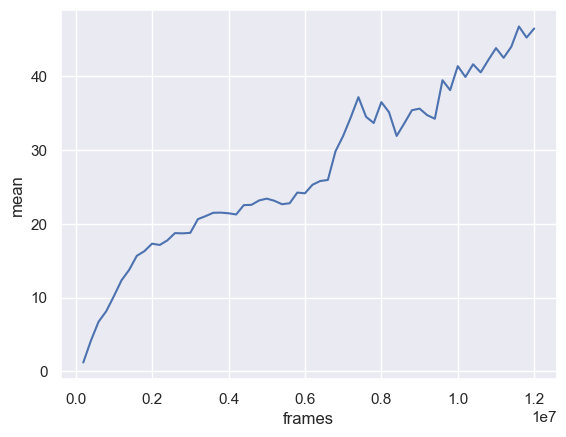

In [ ]:
sns.lineplot(data = df, x="frames", y="mean")
plt.show()

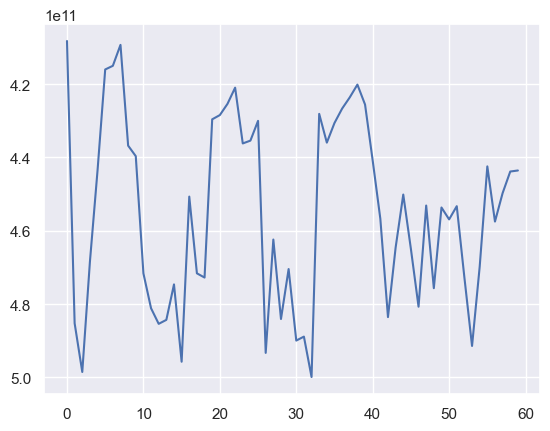

In [ ]:
times = [stat["epoch_time"] for stat in training_stats]
sns.lineplot(x=range(len(times)), y=times)
plt.show()

### Test dqn agent training

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os, sys
import yaml
import itertools
from pathlib import Path
import datetime
import multiprocessing

proj_root = os.path.dirname(os.path.abspath("."))
sys.path.append(proj_root)

In [5]:
import time
import datetime
import torch
import random
import numpy as np
import os
from pathlib import Path
import argparse

import torch.optim as optim
import torch.nn.functional as F

import gym 

from minatar_dqn.replay_buffer import ReplayBuffer
from experiments.experiment_utils import seed_everything
from minatar_dqn.utils.my_logging import setup_logger
from minatar_dqn.models import Conv_QNET, Conv_QNET_one

from minatar_dqn.my_dqn import AgentDQN, build_environment
from experiments.experiment_utils import collect_training_output_files, collect_pruning_output_files

from flatten_dict import flatten
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

c:\Users\Chainsword\anaconda3\envs\general\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [125]:
training_outputs_folder_path = (
    r"D:\Work\PhD\minatar_work\experiments\training\outputs"
)
training_timestamp_folder = "2023_03_19-02_07_18"

experiment_paths = collect_training_output_files(
        os.path.join(training_outputs_folder_path, training_timestamp_folder)
    )

def get_records_from_training_experiment(experiment_files, stats = "validation"):
    
    checkpoint = torch.load(experiment_files["stats_path"])
    
    training_stats = checkpoint["training_stats"]
    validation_stats = checkpoint["validation_stats"]

    if stats == "training":
        flat_records = process_records_from_stats_and_config(training_stats, experiment_files["config_path"])
    elif stats == "validation":
        flat_records = process_records_from_stats_and_config(validation_stats, experiment_files["config_path"])
    
    return flat_records

def process_records_from_stats_and_config(stats, config_path):

    flat_records = []
    for epoch_stats in stats:
        flat_stats = flatten(epoch_stats, reducer="underscore")  
        flat_stats["epoch_type"] = "training"
        flat_records.append(flat_stats)

    with open(config_path, "r") as f:
        config = yaml.safe_load(f)

    # build experiment name cause I did not think to save some kind of 
    # exp name in config
    config_file_name = os.path.basename(config_path)
    exp_name_tokens = config_file_name.split("_")[:2]
    exp_name = "_".join(exp_name_tokens)

    # add info from the config file
    for record in flat_records:
        record["environment"] = config["environment"]
        record["seed"] = config["seed"]
        record["experiment_name"] = exp_name
        
    return flat_records

def collect_training_experiment_results(experiment_paths, stats="validation", train_epoch_counter = 200_000):
    records = []
    for experiment_files in experiment_paths:
        records.extend(get_records_from_training_experiment(experiment_files, stats=stats))

    print(len(records))
    df = pd.DataFrame.from_records(records)
    df["epoch"] = df["frame_stamp"] // train_epoch_counter 

    return df

df = collect_training_experiment_results(experiment_paths, stats="validation")
# df = collect_training_experiment_results(experiment_paths, stats="training")

df.head()

1440


,frame_stamp,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_frames_min,episode_frames_max,episode_frames_mean,episode_frames_median,...,episode_max_qs_max,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,epoch_time,epoch_type,environment,seed,experiment_name,epoch
0,200000,0.0,6.0,0.620690,0.0,0.997023,16,413,100.248597,81.0,...,2.569765,0.908776,0.905044,0.350517,0 days 00:00:34.234896,training,asterix,0,conv16_lin64,1
1,400000,0.0,47.0,12.920578,10.0,10.476767,43,983,452.685921,432.0,...,5.416811,2.769881,2.652567,0.552959,0 days 00:00:35.730587,training,asterix,0,conv16_lin64,2
2,600000,0.0,63.0,26.928571,26.0,16.157207,36,1112,687.401099,772.0,...,7.570930,4.736427,4.554769,0.568479,0 days 00:00:34.197062,training,asterix,0,conv16_lin64,3
3,800000,0.0,74.0,31.938889,34.0,18.800758,43,1094,697.688889,788.0,...,9.308278,5.989927,5.783884,0.580341,0 days 00:00:35.931799,training,asterix,0,conv16_lin64,4
4,1000000,0.0,105.0,37.402439,38.5,20.222759,56,1243,765.853659,830.0,...,9.040720,6.231241,6.029999,0.561875,0 days 00:00:35.219468,training,asterix,0,conv16_lin64,5


In [124]:
df.columns

Index(['frame_stamp', 'episode_rewards_min', 'episode_rewards_max',
       'episode_rewards_mean', 'episode_rewards_median', 'episode_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_max_qs_min',
       'episode_max_qs_max', 'episode_max_qs_mean', 'episode_max_qs_median',
       'episode_max_qs_std', 'epoch_time', 'epoch_type', 'seed',
       'experiment_name', 'epoch'],
      dtype='object')

In [126]:
avg_df = df.groupby(['environment', 'experiment_name', 'epoch']).mean().reset_index()
avg_df.head()

C:\Users\Chainsword\AppData\Local\Temp\ipykernel_27644\2015263435.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = df.groupby(['environment', 'experiment_name', 'epoch']).mean().reset_index()


,environment,experiment_name,epoch,frame_stamp,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_frames_min,episode_frames_max,episode_frames_mean,episode_frames_median,episode_frames_std,episode_max_qs_min,episode_max_qs_max,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,seed
0,asterix,conv16_lin64,1,200000.0,0.0,9.333333,1.040638,0.666667,1.493818,21.000000,469.333333,112.882097,89.333333,78.296754,0.105819,2.906617,1.014376,1.006703,0.405494,1.0
1,asterix,conv16_lin64,2,400000.0,0.0,46.333333,13.270094,11.000000,10.361177,36.666667,985.000000,439.255255,430.500000,237.677259,1.649306,6.156019,3.404398,3.295745,0.607107,1.0
2,asterix,conv16_lin64,3,600000.0,0.0,70.333333,28.024567,27.166667,17.947006,39.333333,1067.666667,637.663749,704.333333,274.299713,3.219153,7.967877,5.099730,4.924175,0.586371,1.0
3,asterix,conv16_lin64,4,800000.0,0.0,71.000000,27.900408,26.000000,18.627977,34.000000,1102.666667,625.180951,662.833333,290.664575,3.688226,8.808790,5.869218,5.691597,0.595118,1.0
4,asterix,conv16_lin64,5,1000000.0,0.0,94.333333,36.234252,37.166667,21.707636,53.000000,1186.666667,703.300536,790.333333,287.622949,4.024413,9.177154,6.266295,6.086210,0.564297,1.0


In [110]:
df["experiment_name"].unique()

array(['conv16_lin64', 'conv32_lin128', 'conv64_lin256', 'conv8_lin32'],
      dtype=object)

C:\Users\Chainsword\AppData\Local\Temp\ipykernel_27644\226540524.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = df.groupby(['experiment_name', 'epoch']).mean().reset_index()


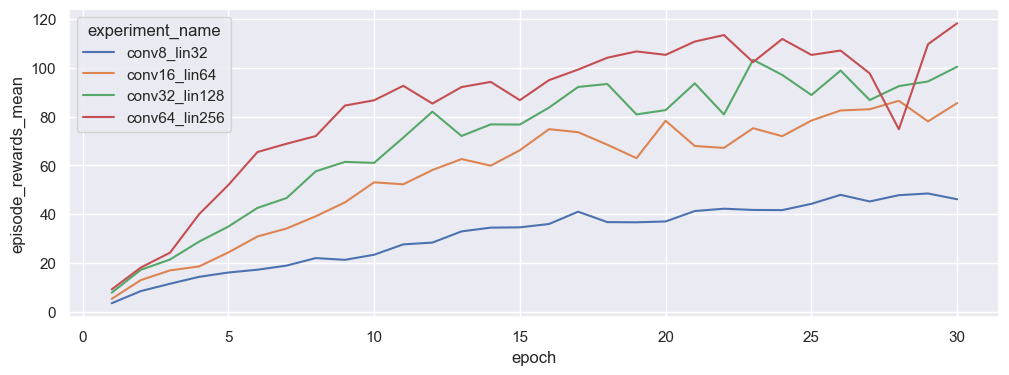

In [111]:
experiment_order = ['conv8_lin32', 'conv16_lin64', 'conv32_lin128', 'conv64_lin256']

# Compute the average metric between the seeds for each experiment
avg_df = df.groupby(['environment', 'experiment_name', 'epoch']).mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(avg_df, x="epoch", y="episode_rewards_mean", hue='experiment_name', hue_order = experiment_order, ax = ax)

fig.suptitle("Validation mean reward")


# Show the plot
plt.show()

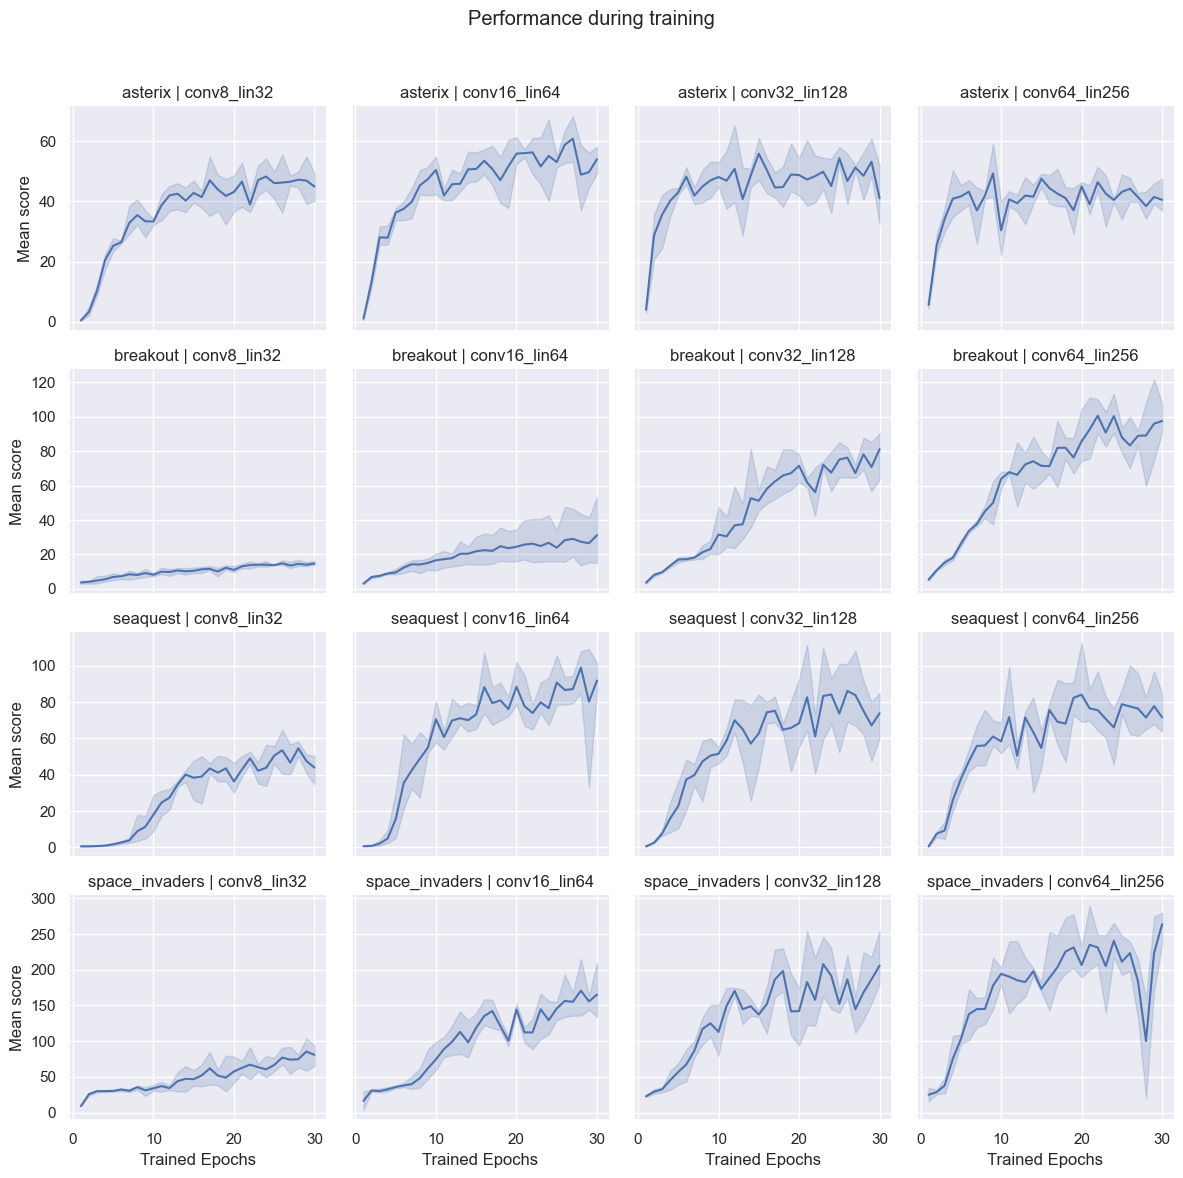

In [164]:
experiment_order = ['conv8_lin32', 'conv16_lin64', 'conv32_lin128', 'conv64_lin256']

# Compute the average metric between the seeds for each experiment
# avg_df = df.groupby(['environment', 'experiment_name', 'epoch']).mean().reset_index()

g = sns.FacetGrid(df, col_order=experiment_order, row='environment', col='experiment_name', 
height=3, aspect=1, sharey="row")
g.map(sns.lineplot, 'epoch', 'episode_rewards_mean')

# Set the plot title and axis labels
g.fig.suptitle('Performance during training')
g.set_titles(row_template='{row_name}', col_template='{col_name}', fontsize=1)

g.figure.subplots_adjust(top=0.9, wspace=0.1)
g.set_axis_labels('Trained Epochs', 'Mean score')

# Show the plot
plt.show()

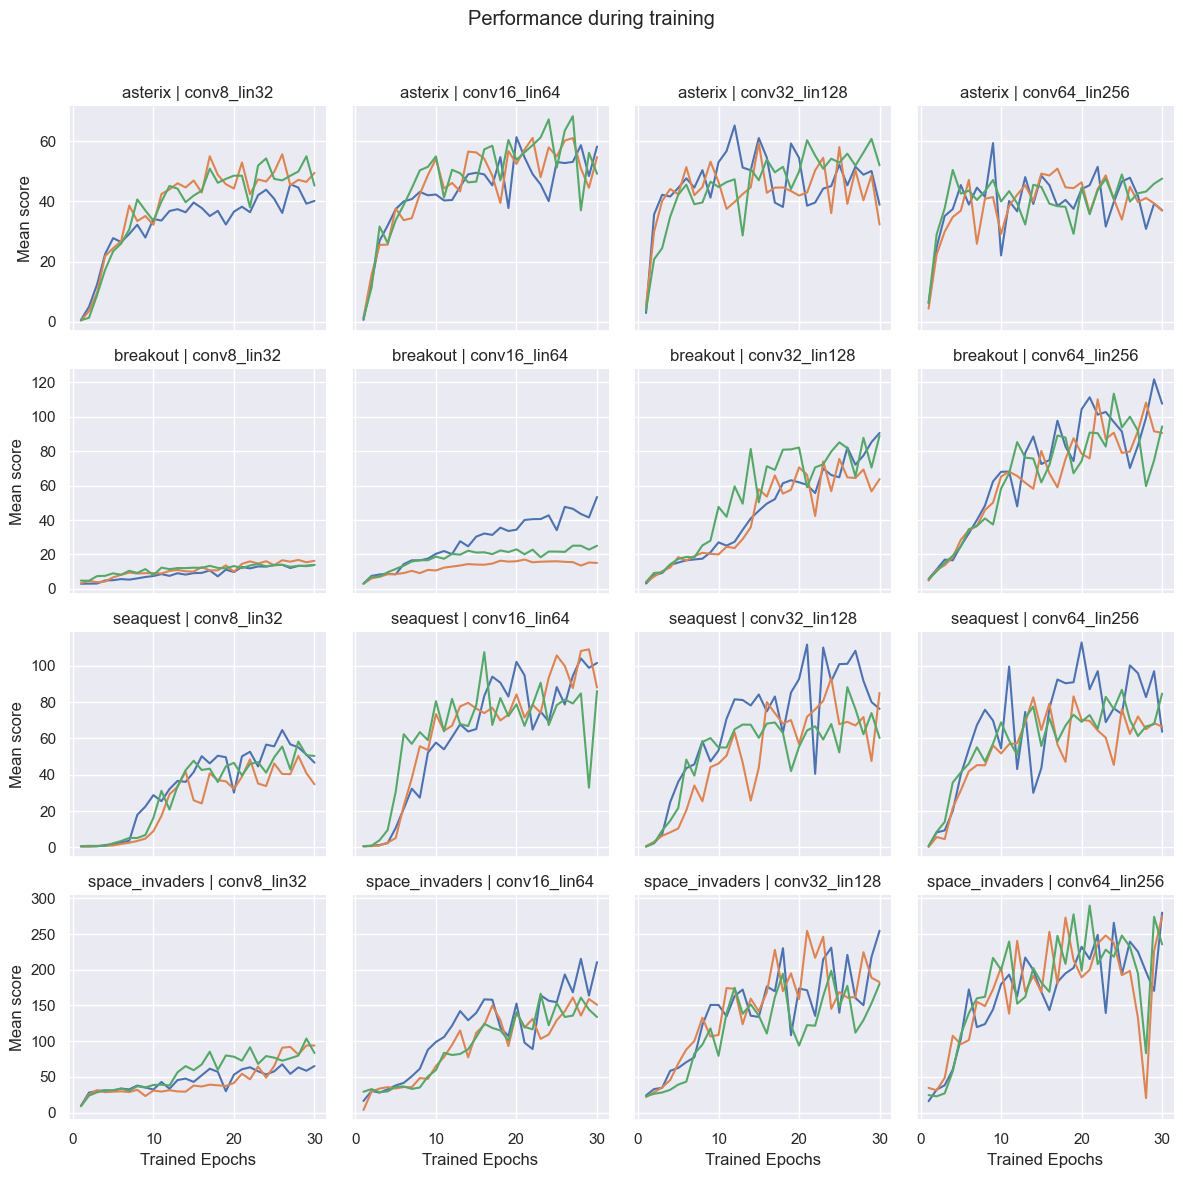

In [167]:
experiment_order = ['conv8_lin32', 'conv16_lin64', 'conv32_lin128', 'conv64_lin256']

# Compute the average metric between the seeds for each experiment
avg_df = df.groupby(['environment', 'experiment_name', 'epoch']).mean().reset_index()

g = sns.FacetGrid(df, col_order=experiment_order, row='environment', col='experiment_name', 
height = 3, hue="seed", aspect=1, sharey="row")
g.map(sns.lineplot, 'epoch', 'episode_rewards_mean')

g.fig.suptitle('Performance during training')
g.set_titles(row_template='{row_name}', col_template='{col_name}', fontsize=1)

g.figure.subplots_adjust(top=0.9, wspace=0.1)
g.set_axis_labels('Trained Epochs', 'Mean score')

# Show the plot
plt.show()

In [6]:
pruning_outputs_folder_path = (
    r"D:\Work\PhD\minatar_work\experiments\pruning\outputs"
)
pruning_timestamp_folder = "2023_03_19-02_07_18"

experiment_paths = collect_pruning_output_files(
        os.path.join(pruning_outputs_folder_path, pruning_timestamp_folder)
    )

In [7]:
experiment_paths[0]

{'pruning_folder_path': 'D:\\Work\\PhD\\minatar_work\\experiments\\pruning\\outputs\\2023_03_19-02_07_18\\conv16_lin64\\asterix\\0',
 'config_path': 'D:\\Work\\PhD\\minatar_work\\experiments\\pruning\\outputs\\2023_03_19-02_07_18\\conv16_lin64\\asterix\\0\\conv16_lin64_asterix_0_config',
 'pruning_stats_paths': ['D:\\Work\\PhD\\minatar_work\\experiments\\pruning\\outputs\\2023_03_19-02_07_18\\conv16_lin64\\asterix\\0\\pruning_results_1',
  'D:\\Work\\PhD\\minatar_work\\experiments\\pruning\\outputs\\2023_03_19-02_07_18\\conv16_lin64\\asterix\\0\\pruning_results_2',
  'D:\\Work\\PhD\\minatar_work\\experiments\\pruning\\outputs\\2023_03_19-02_07_18\\conv16_lin64\\asterix\\0\\pruning_results_3',
  'D:\\Work\\PhD\\minatar_work\\experiments\\pruning\\outputs\\2023_03_19-02_07_18\\conv16_lin64\\asterix\\0\\pruning_results_4'],
 'baseline_stats_path': 'D:\\Work\\PhD\\minatar_work\\experiments\\pruning\\outputs\\2023_03_19-02_07_18\\conv16_lin64\\asterix\\0\\baseline'}

In [8]:
experiment_paths[0]
experiment_paths[0]["stats_paths"][0]
experiment_paths[0]


KeyError: 'stats_paths'

In [11]:
def process_pruning_stats_file(file):

    checkpoint = torch.load(file)

    exp_stats = checkpoint["pruning_validation_results"]
    exp_info = checkpoint["experiment_info"]

    records = []
    for pruning_value in exp_stats:
        stats = exp_stats[pruning_value]
        stats["pruning_value"] = pruning_value
        stats["pruning_method"] = os.path.basename(file).split("_")[-1]
        stats["experiment_info"] = exp_info
        records.append(stats)

    return records

def add_baseline_stats(baseline_file, file):
    """Add a new record with the baseline stats and an associated 
    pruning_method just to make data aggregation easier."""
    checkpoint = torch.load(baseline_file)
    baseline_stats = checkpoint["pruning_validation_results"]
    baseline_info = checkpoint["experiment_info"]

    records = []
    for pruning_value in baseline_stats:
        stats = baseline_stats[pruning_value]
        stats["pruning_value"] = pruning_value
        stats["pruning_method"] = os.path.basename(file).split("_")[-1]
        stats["experiment_info"] = baseline_info

        records.append(stats)
        
    return records

def get_records_from_pruning_experiment(experiment_files):

    config_path = experiment_files["config_path"]

    stats = []
    for file in experiment_files["pruning_stats_paths"]:
        stats.extend(process_pruning_stats_file(file))
        stats.extend(add_baseline_stats(experiment_files["baseline_stats_path"], file))
    
    flat_records = []
    for epoch_stats in stats:
        flat_stats = flatten(epoch_stats, reducer="underscore")  
        flat_records.append(flat_stats)

    with open(config_path, "r") as f:
        config = yaml.safe_load(f)

    # build experiment name cause I did not think to save some kind of 
    # exp name in config
    config_file_name = os.path.basename(config_path)
    exp_name_tokens = config_file_name.split("_")[:2]
    exp_name = "_".join(exp_name_tokens)

    # add info from the config file
    for record in flat_records:
        record["environment"] = config["environment"]
        record["seed"] = config["seed"]
        record["model_name"] = exp_name

    return flat_records
    
def collect_pruning_experiment_results(experiment_paths):

    records = []
    for experiment_files in experiment_paths:
        records.extend(get_records_from_pruning_experiment(experiment_files))

    df = pd.DataFrame.from_records(records)
    # df["epoch"] = df["frame_stamp"] // train_epoch_counter 

    return df

df = collect_pruning_experiment_results(experiment_paths)

pruning_method_nr_to_name = {
    '1': 'prune_middle',
    '2': 'prune_features',
    '3': 'prune_all',
    '4': 's_prune_conv'
}

# Map the 'fruit' column to 'color'
df['pruning_method'] = df['pruning_method'].map(pruning_method_nr_to_name)

df.head()

,frame_stamp,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_frames_min,episode_frames_max,episode_frames_mean,episode_frames_median,...,episode_max_qs_mean,episode_max_qs_median,episode_max_qs_std,epoch_time,pruning_value,pruning_method,experiment_info,environment,seed,model_name
0,0,0.0,150.0,48.794872,47.0,32.418679,49,1477,805.705128,919.0,...,7.796334,7.762791,0.609390,0 days 00:00:38.467349,0.05,prune_middle,\n Prune the second convolutional layer and...,asterix,0,conv16_lin64
1,0,2.0,194.0,53.693878,53.0,33.345973,105,1800,858.714286,940.0,...,7.784241,7.754467,0.617553,0 days 00:00:39.012365,0.10,prune_middle,\n Prune the second convolutional layer and...,asterix,0,conv16_lin64
2,0,0.0,190.0,54.448276,52.0,37.565011,35,1794,865.331034,938.0,...,7.752492,7.721330,0.623784,0 days 00:00:39.041906,0.15,prune_middle,\n Prune the second convolutional layer and...,asterix,0,conv16_lin64
3,0,1.0,234.0,52.088435,54.0,34.732197,83,2030,851.448980,953.0,...,7.646596,7.614089,0.607112,0 days 00:00:38.820601,0.20,prune_middle,\n Prune the second convolutional layer and...,asterix,0,conv16_lin64
4,0,0.0,135.0,40.426752,36.0,29.511566,56,1601,796.700637,906.0,...,7.437605,7.389888,0.586316,0 days 00:00:38.900046,0.30,prune_middle,\n Prune the second convolutional layer and...,asterix,0,conv16_lin64


In [57]:
df.columns

Index(['frame_stamp', 'episode_rewards_min', 'episode_rewards_max',
       'episode_rewards_mean', 'episode_rewards_median', 'episode_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_max_qs_min',
       'episode_max_qs_max', 'episode_max_qs_mean', 'episode_max_qs_median',
       'episode_max_qs_std', 'epoch_time', 'pruning_value', 'pruning_method',
       'experiment_info', 'environment', 'seed', 'model_name'],
      dtype='object')

In [12]:
df["pruning_value"].unique()

array([0.05, 0.1 , 0.15, 0.2 , 0.3 , 0.4 , 0.5 , 0.  ])

In [17]:
def plot_facetgrid_experiment(df, y_label = "Mean score", title="Mean score at different levels of pruning"):

    experiment_order = ['conv8_lin32', 'conv16_lin64', 'conv32_lin128', 'conv64_lin256']

    # Compute the average metric between the seeds for each experiment
    # avg_df = df.groupby(['environment', 'experiment_name', 'epoch']).mean().reset_index()

    g = sns.FacetGrid(df, row='pruning_method', col='model_name', col_order=experiment_order, 
    height=3, aspect=1, sharey="row")
    g.map(sns.lineplot, 'pruning_value', 'episode_rewards_mean')

    # Set the plot title and axis labels
    g.fig.suptitle(title)
    g.set_titles(row_template='{row_name}', col_template='{col_name}', fontsize=1)

    g.figure.subplots_adjust(top=0.9, wspace=0.1)
    g.set_axis_labels('Pruning factor', y_label)

In [18]:
df["environment"].unique()

array(['asterix', 'breakout', 'seaquest', 'space_invaders'], dtype=object)

In [19]:
# df[(df["environment"]=="asterix") & (df["pruning_value"]==0)]

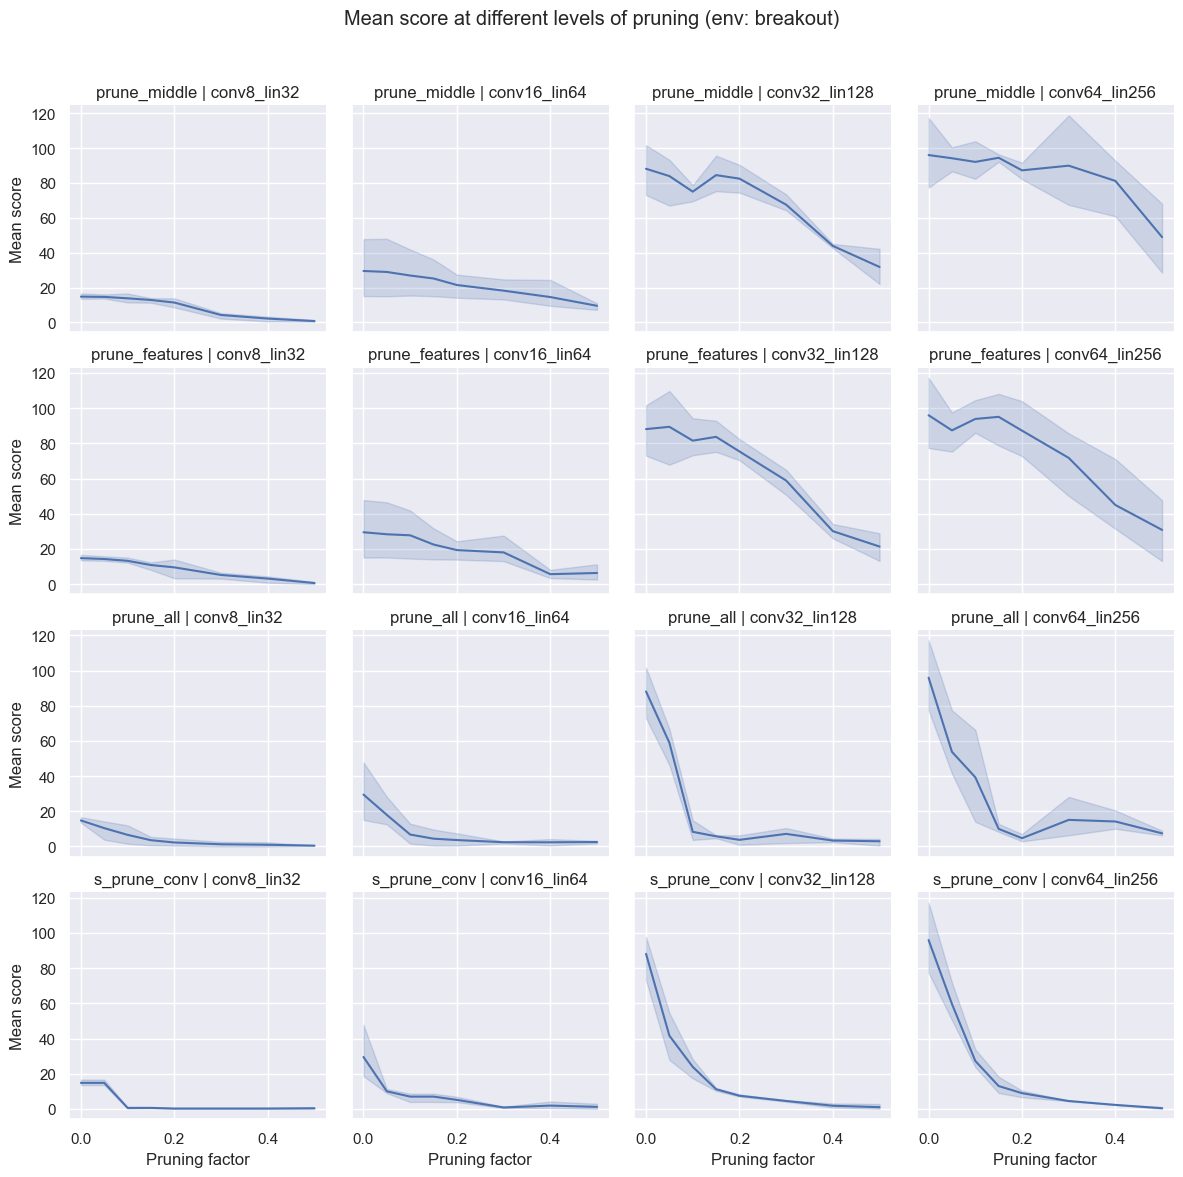

In [20]:
game = "breakout"
sub_df = df[df["environment"]==game]
plot_facetgrid_experiment(sub_df, title=f"Mean score at different levels of pruning (env: {game})")

# Show the plot
plt.show()

In [73]:
df.columns

Index(['frame_stamp', 'episode_rewards_min', 'episode_rewards_max',
       'episode_rewards_mean', 'episode_rewards_median', 'episode_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_max_qs_min',
       'episode_max_qs_max', 'episode_max_qs_mean', 'episode_max_qs_median',
       'episode_max_qs_std', 'epoch_time', 'pruning_value', 'pruning_method',
       'experiment_info', 'environment', 'seed', 'model_name'],
      dtype='object')

In [83]:
# sub_df[sub_df["pruning_value"]==0][["episode_rewards_mean", "episode_frames_mean", 'pruning_value', 'pruning_method',
#        'experiment_info', 'environment', 'seed', 'model_name']]

In [21]:
def normalize_df_using_baseline_single_env(df):
    
    cols_to_not_normalize = ['frame_stamp', 'epoch_time', 'pruning_value', 'pruning_method',
       'experiment_info', 'environment', 'seed', 'model_name']

    # Find the baseline values
    baseline = df[(df["pruning_value"] == 0)]

    groups = df.groupby(["model_name", "seed"])

    for (model_name, seed), group in groups:
    
        for metric in group.columns.difference(cols_to_not_normalize):

            # Get the baseline value for this metric and model/seed/pruning_method combination
            baseline_value = baseline[(baseline["model_name"] == model_name) & (baseline["seed"] == seed)][metric].iloc[0]
        
            # Normalize the values for this metric by the baseline value
            group[metric] /= baseline_value
            
            # Store the normalized values back in the original DataFrame
            df.loc[group.index, metric] = group[metric]

    return df

def normalize_df_using_baseline_all_envs(df):
    
    cols_to_not_normalize = ['frame_stamp', 'epoch_time', 'pruning_value', 'pruning_method',
       'experiment_info', 'environment', 'seed', 'model_name']

    # Find the baseline values
    baseline = df[(df["pruning_value"] == 0)]

    groups = df.groupby(["environment", "model_name", "seed"])

    for (environment, model_name, seed), group in groups:
    
        for metric in group.columns.difference(cols_to_not_normalize):

            # Get the baseline value for this metric and model/seed/pruning_method combination
            baseline_value = baseline[(baseline["environment"] == environment) & (baseline["model_name"] == model_name) & (baseline["seed"] == seed)][metric].iloc[0]
        
            # Normalize the values for this metric by the baseline value
            group[metric] /= baseline_value
            
            # Store the normalized values back in the original DataFrame
            df.loc[group.index, metric] = group[metric]

    return df

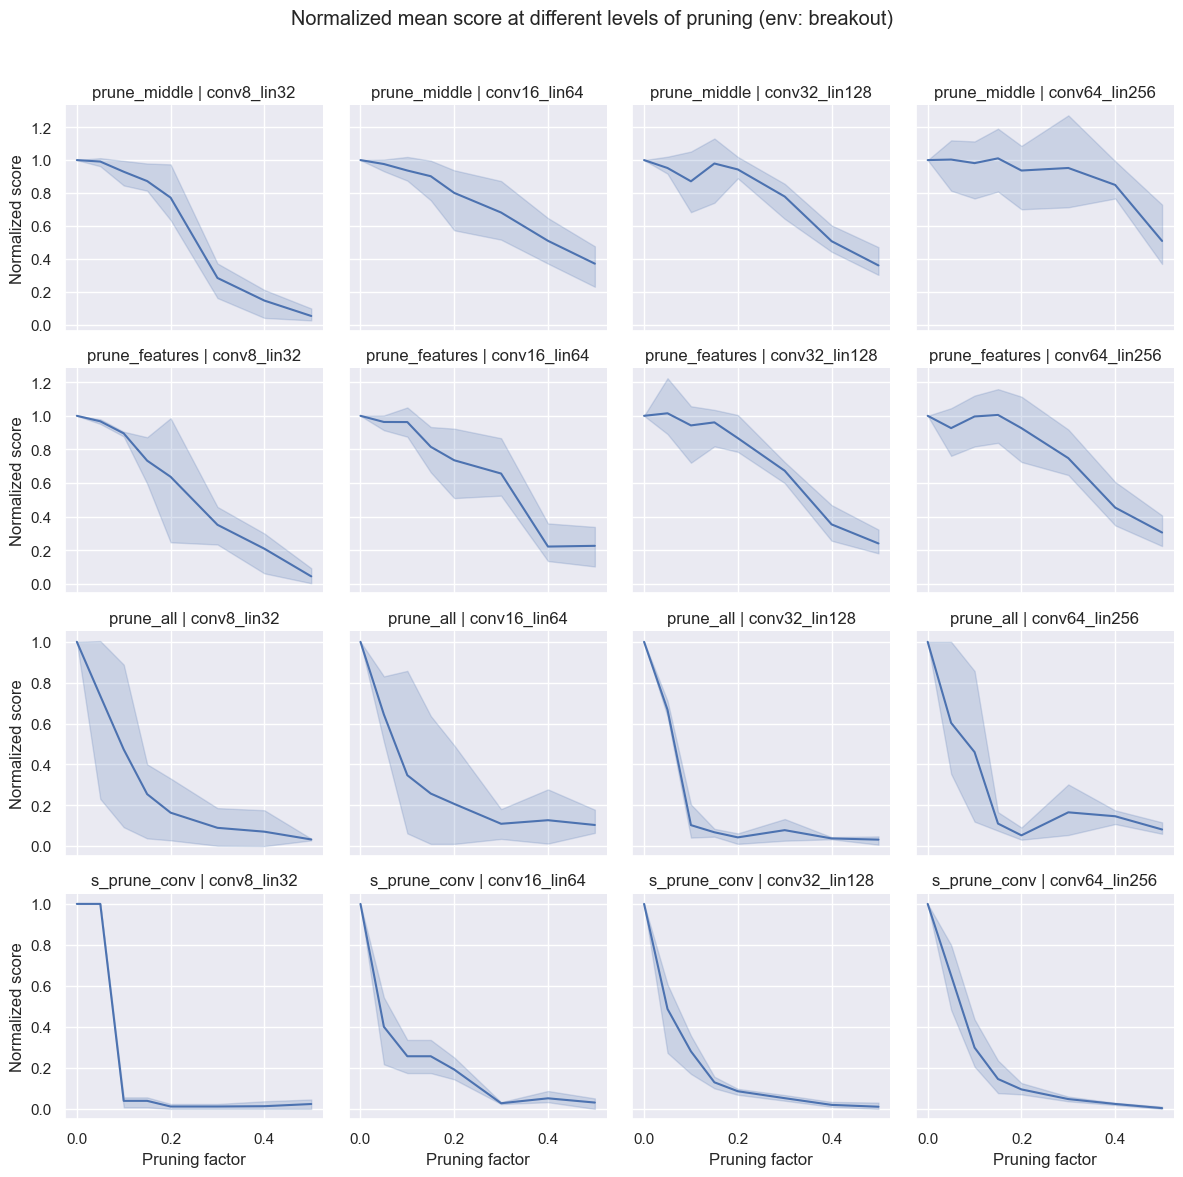

In [22]:
game = "breakout"
sub_df = df[df["environment"]==game]
sub_df = normalize_df_using_baseline_single_env(sub_df)

plot_facetgrid_experiment(sub_df, y_label = "Normalized score", title=f"Normalized mean score at different levels of pruning (env: {game})")

# Show the plot
plt.show()

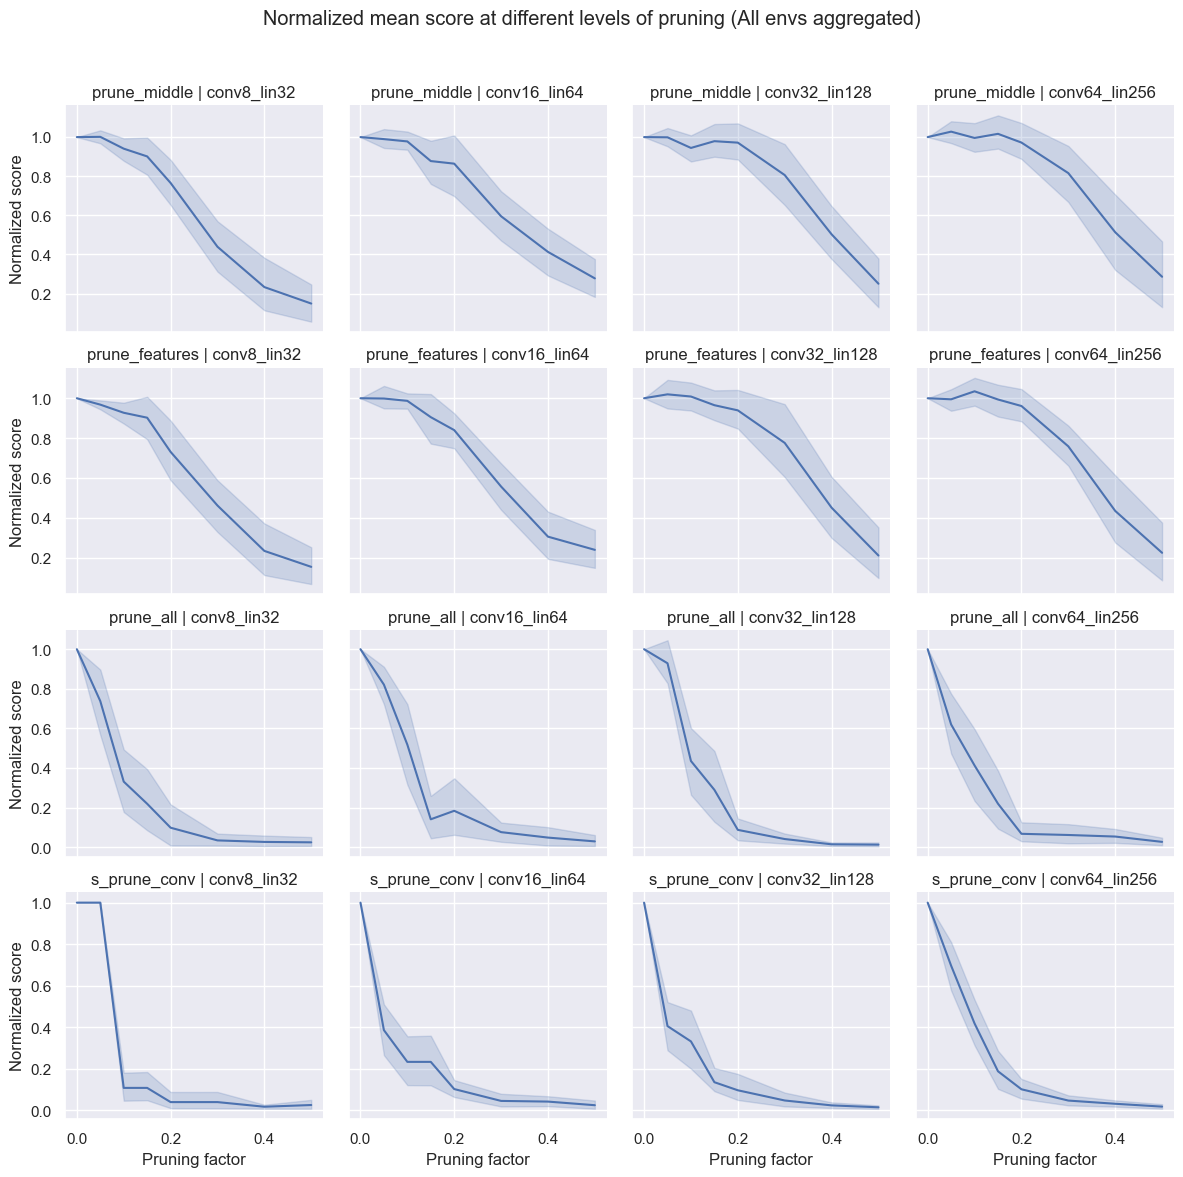

In [23]:
sub_df = df.copy(deep=True)
sub_df = normalize_df_using_baseline_all_envs(sub_df)

plot_facetgrid_experiment(sub_df, y_label = "Normalized score", title=f"Normalized mean score at different levels of pruning (All envs aggregated)")

# Show the plot
plt.show()

In [24]:
sub_df["pruning_method"].unique()

array(['prune_middle', 'prune_features', 'prune_all', 's_prune_conv'],
      dtype=object)

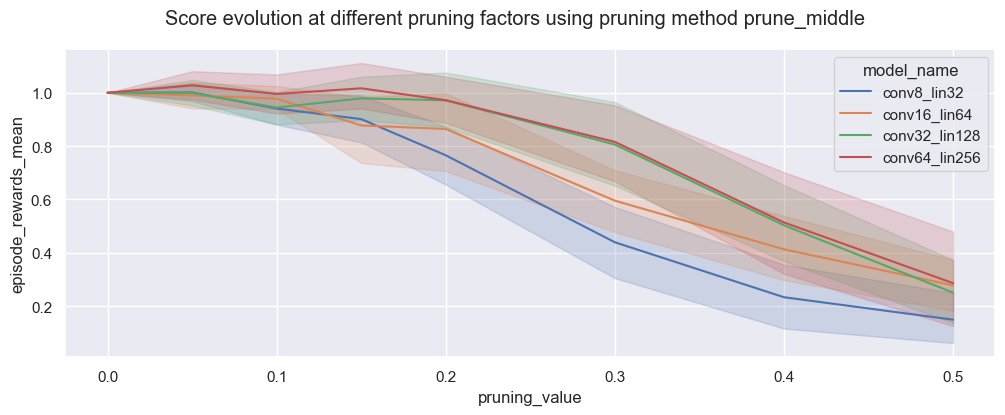

In [25]:
pr_method = "prune_middle"
meth_1_df = sub_df[sub_df["pruning_method"]==pr_method]

experiment_order = ['conv8_lin32', 'conv16_lin64', 'conv32_lin128', 'conv64_lin256']

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(meth_1_df, x="pruning_value", y="episode_rewards_mean", hue='model_name', hue_order = experiment_order, ax = ax)

fig.suptitle(f"Score evolution at different pruning factors using pruning method {pr_method}")


# Show the plot
plt.show()

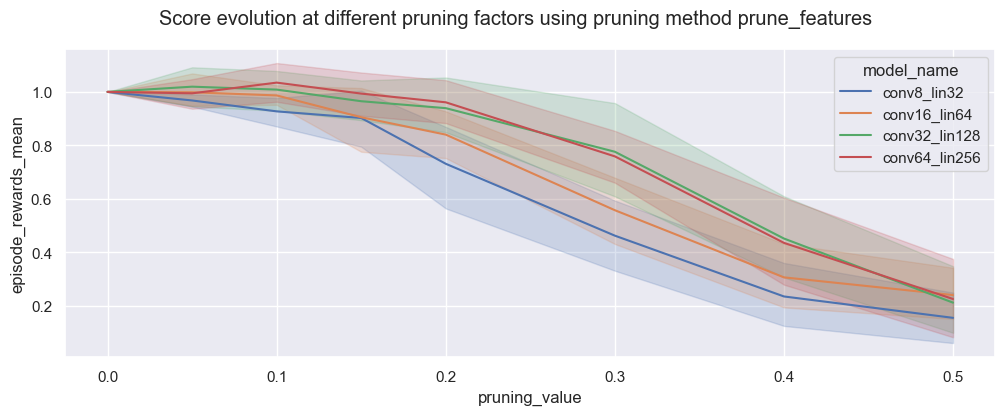

In [27]:
pr_method = "prune_features"
meth_2_df = sub_df[sub_df["pruning_method"]==pr_method]

experiment_order = ['conv8_lin32', 'conv16_lin64', 'conv32_lin128', 'conv64_lin256']

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(meth_2_df, x="pruning_value", y="episode_rewards_mean", hue='model_name', hue_order = experiment_order, ax = ax)

fig.suptitle(f"Score evolution at different pruning factors using pruning method {pr_method}")


# Show the plot
plt.show()

In [30]:
df["pruning_value"].unique()

array([0.05, 0.1 , 0.15, 0.2 , 0.3 , 0.4 , 0.5 , 0.  ])

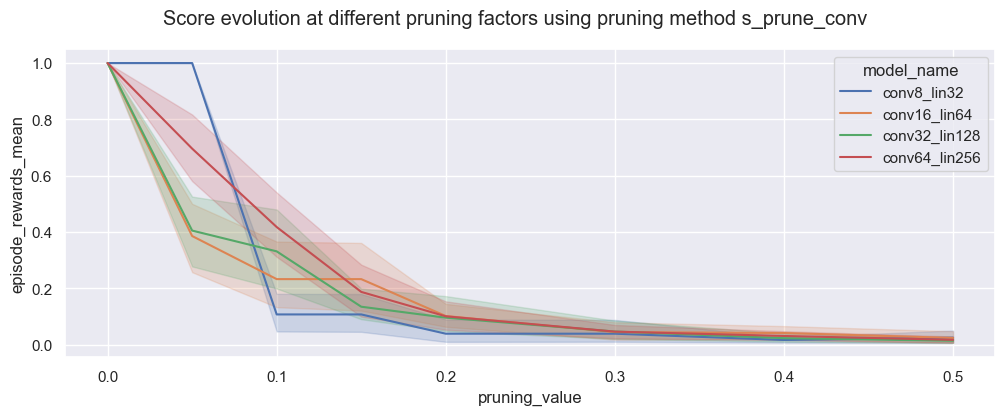

In [29]:
pr_method = "s_prune_conv"
meth_4_df = sub_df[sub_df["pruning_method"]==pr_method]

experiment_order = ['conv8_lin32', 'conv16_lin64', 'conv32_lin128', 'conv64_lin256']

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(meth_4_df, x="pruning_value", y="episode_rewards_mean", hue='model_name', hue_order = experiment_order, ax = ax)

fig.suptitle(f"Score evolution at different pruning factors using pruning method {pr_method}")


# Show the plot
plt.show()